In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **Dataset**

## **Load Data**

Baca dataset dari file CSV dan simpan ke dalam DataFrame.

In [ ]:
courses_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/courses.csv')
assessments_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/assessments.csv')
vle_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/vle.csv')
student_info_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentInfo.csv')
student_registration_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentRegistration.csv')
student_assessment_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentAssessment.csv')
student_vle_df = pd.read_csv('/content/drive/MyDrive/AnalisisBigData/anonymisedData/studentVle.csv')

# **courses**

## **EDA (Exploratory Data Analysis)**

Menampilkan beberapa baris pertama dari dataset courses_df untuk melihat sampel data.

In [ ]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Menampilkan beberapa baris terakhir dari dataset courses_df.

In [ ]:
courses_df.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


Memberikan informasi tentang struktur dataset, tipe data kolom, dan jumlah nilai non-null.

In [ ]:
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


Menghitung jumlah nilai unik dalam setiap kolom dataset.

In [ ]:
courses_df.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

Menampilkan statistik deskriptif seperti rata-rata, median, kuartil, dan lainnya untuk kolom numerik.

In [ ]:
courses_df.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


Menghitung jumlah nilai null (NaN) dalam setiap kolom dataset.

In [ ]:
courses_df.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Menghitung jumlah baris yang duplikat dalam dataset.

In [ ]:
courses_df.duplicated().sum()

0

Menampilkan grafik batang untuk menggambarkan frekuensi kode modul, kode presentasi, dan durasi presentasi.

In [ ]:
sns.set(style="whitegrid")

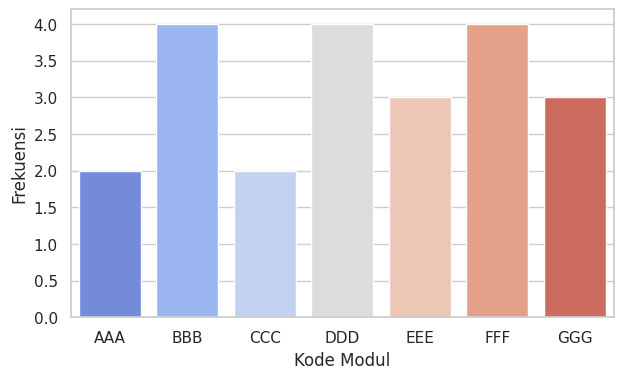

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=courses_df, x='code_module', palette='coolwarm')
plt.xlabel('Kode Modul')
plt.ylabel('Frekuensi')
plt.show()

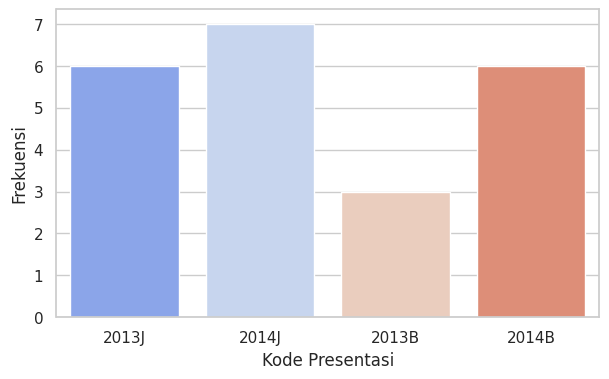

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=courses_df, x='code_presentation', palette='coolwarm')
plt.xlabel('Kode Presentasi')
plt.ylabel('Frekuensi')
plt.show()

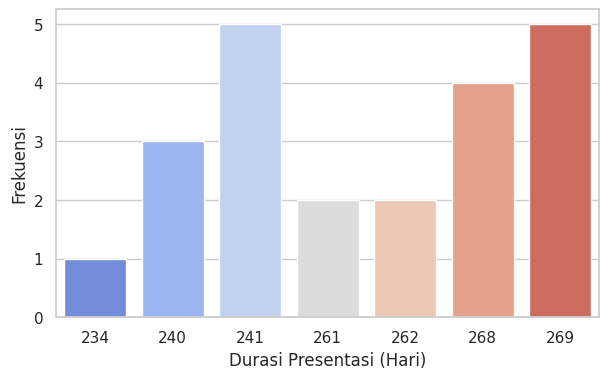

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=courses_df, x='module_presentation_length', palette='coolwarm')
plt.xlabel('Durasi Presentasi (Hari)')
plt.ylabel('Frekuensi')
plt.show()

Menampilkan statistik deskriptif untuk durasi presentasi berdasarkan kode modul.

In [ ]:
module_summary = courses_df.groupby('code_module')['module_presentation_length'].describe()
module_summary

,count,mean,std,min,25%,50%,75%,max
code_module,,,,,,,,
AAA,2.0,268.500000,0.707107,268.0,268.25,268.5,268.75,269.0
BBB,4.0,251.000000,16.532796,234.0,238.50,251.0,263.50,268.0
CCC,2.0,255.000000,19.798990,241.0,248.00,255.0,262.00,269.0
DDD,4.0,251.000000,12.138094,240.0,240.75,251.0,261.25,262.0
EEE,3.0,259.333333,15.885003,241.0,254.50,268.0,268.50,269.0
FFF,4.0,254.500000,16.176114,240.0,240.75,254.5,268.25,269.0
GGG,3.0,257.000000,14.422205,241.0,251.00,261.0,265.00,269.0


Menampilkan heatmap untuk memvisualisasikan korelasi antara kode modul dan kode presentasi.

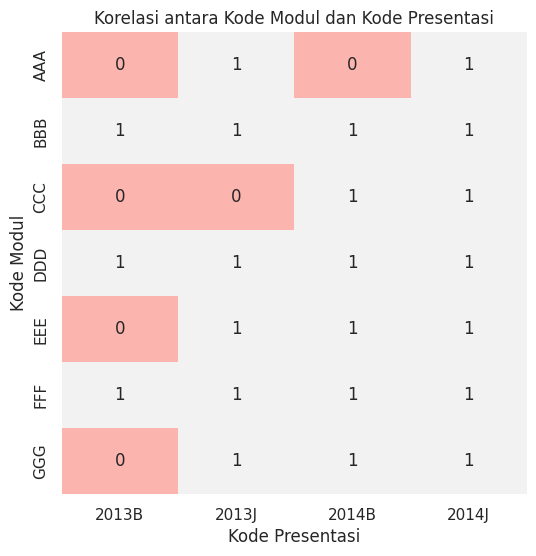

In [ ]:
module_presentation_counts = courses_df.groupby(['code_module', 'code_presentation']).size().unstack(fill_value=0)
plt.figure(figsize=(6, 6))
sns.heatmap(module_presentation_counts, annot=True, fmt='d', cmap='Pastel1', cbar=False)
plt.xlabel('Kode Presentasi')
plt.ylabel('Kode Modul')
plt.title('Korelasi antara Kode Modul dan Kode Presentasi')
plt.show()

Memisahkan data berdasarkan tipe presentasi (B dan J) pada kolom 'code_presentation'.

In [ ]:
df_B = courses_df[courses_df['code_presentation'].str.endswith('B')]
df_J = courses_df[courses_df['code_presentation'].str.endswith('J')]

Menampilkan statistik deskriptif untuk durasi presentasi dalam dataframe yang telah dipisahkan.


In [ ]:
df_B.describe()

,module_presentation_length
count,9.000000
mean,239.888889
std,2.260777
min,234.000000
25%,240.000000
50%,241.000000
75%,241.000000
max,241.000000


In [ ]:
df_J.describe()

,module_presentation_length
count,13.000000
mean,266.384615
std,3.428762
min,261.000000
25%,262.000000
50%,268.000000
75%,269.000000
max,269.000000


## **Pre Processing**

### **Label Encoding**

Melakukan label encoding pada dataset untuk mengubah nilai-nilai kategori menjadi angka.

In [ ]:
courses_encoding = courses_df.apply(LabelEncoder().fit_transform)

In [ ]:
courses_encoding.head()

,code_module,code_presentation,module_presentation_length
0,0,1,5
1,0,3,6
2,1,1,5
3,1,3,4
4,1,0,1


### **Data Normalization**

Menggunakan MinMaxScaler untuk melakukan normalisasi data ke dalam rentang 0 hingga 1.

In [ ]:
courses_scaler = MinMaxScaler(feature_range=(0,1))
courses_scale = courses_scaler.fit_transform(courses_encoding)
courses_normalisasi = pd.DataFrame(courses_scale, columns=courses_encoding.columns)

In [ ]:
courses_normalisasi.head()

,code_module,code_presentation,module_presentation_length
0,0.000000,0.333333,0.833333
1,0.000000,1.000000,1.000000
2,0.166667,0.333333,0.833333
3,0.166667,1.000000,0.666667
4,0.166667,0.000000,0.166667


# **assessments**

## **EDA (Exploratory Data Analysis)**

In [ ]:
assessments_df.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
assessments_df.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [ ]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
assessments_df.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

In [ ]:
assessments_df.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [ ]:
assessments_df.duplicated().sum()

0

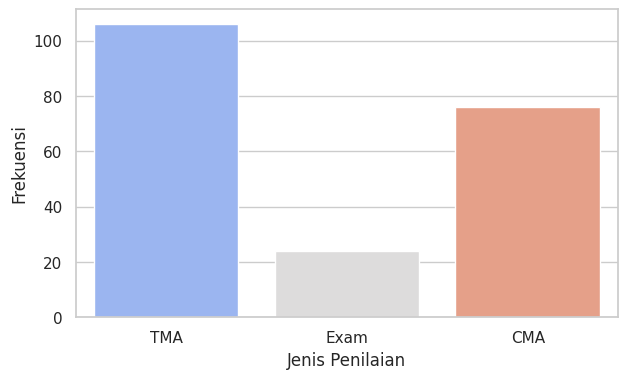

In [ ]:
plt.figure(figsize=(7, 4))
sns.countplot(data=assessments_df, x='assessment_type', palette='coolwarm')
plt.xlabel('Jenis Penilaian')
plt.ylabel('Frekuensi')
plt.show()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
date = assessments_df['date'].mode()[0]
date

In [ ]:
assessments_df['date'].fillna(date, inplace=True)

In [ ]:
assessments_df.isna().sum()

### **Label Encoding**

In [ ]:
assessments_encoding = assessments_df.apply(LabelEncoder().fit_transform)

In [ ]:
assessments_encoding.head()

### **Data Normalization**

In [ ]:
assessments_scaler = MinMaxScaler(feature_range=(0,1))
assessments_scale = assessments_scaler.fit_transform(assessments_encoding)
assessments_normalisasi = pd.DataFrame(assessments_scale, columns=assessments_encoding.columns)

In [ ]:
assessments_normalisasi.head()

# **vle**

## **EDA (Exploratory Data Analysis)**

In [ ]:
vle_df.head()

In [ ]:
vle_df.tail()

In [ ]:
vle_df.info()

In [ ]:
vle_df.nunique()

In [ ]:
vle_df.describe()

In [ ]:
vle_df.isna().sum()

In [ ]:
vle_df.duplicated().sum()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
week_from = vle_df['week_from'].mode()[0]
week_from

In [ ]:
vle_df['week_from'].fillna(week_from, inplace=True)

In [ ]:
week_to = vle_df['week_to'].mode()[0]
week_to

In [ ]:
vle_df['week_to'].fillna(week_to, inplace=True)

In [ ]:
vle_df.isna().sum()

### **Label Encoding**

In [ ]:
vle_encoding = vle_df.apply(LabelEncoder().fit_transform)

In [ ]:
vle_encoding.head()

### **Data Normalization**

In [ ]:
vle_scaler = MinMaxScaler(feature_range=(0,1))
vle_scale = vle_scaler.fit_transform(vle_encoding)
vle_normalisasi = pd.DataFrame(vle_scale, columns=vle_encoding.columns)

In [ ]:
vle_normalisasi.head()

# **studentInfo**

## **EDA (Exploratory Data Analysis)**

In [ ]:
student_info_df.head()

In [ ]:
student_info_df.tail()

In [ ]:
student_info_df.info()

In [ ]:
student_info_df.nunique()

In [ ]:
student_info_df.describe()

In [ ]:
student_info_df.isna().sum()

In [ ]:
student_info_df.duplicated().sum()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
imd_band = student_info_df['imd_band'].mode()[0]
imd_band

In [ ]:
student_info_df['imd_band'].fillna(imd_band, inplace=True)

In [ ]:
student_info_df.isna().sum()

### **Label Encoding**

In [ ]:
student_info_encoding = student_info_df.apply(LabelEncoder().fit_transform)

In [ ]:
student_info_encoding.head()

### **Data Normalization**

In [ ]:
student_info_scaler = MinMaxScaler(feature_range=(0,1))
student_info_scale = student_info_scaler.fit_transform(student_info_encoding)
student_info_normalisasi = pd.DataFrame(student_info_scale, columns=student_info_encoding.columns)

In [ ]:
student_info_normalisasi.head()

# **studentRegistration**

## **EDA (Exploratory Data Analysis)**

In [ ]:
student_registration_df.head()

In [ ]:
student_registration_df.tail()

In [ ]:
student_registration_df.info()

In [ ]:
student_registration_df.nunique()

In [ ]:
student_registration_df.describe()

In [ ]:
student_registration_df.isna().sum()

In [ ]:
student_registration_df.duplicated().sum()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
date_registration = student_registration_df['date_registration'].mode()[0]
date_registration

In [ ]:
student_registration_df['date_registration'].fillna(date_registration, inplace=True)

In [ ]:
date_unregistration = student_registration_df['date_unregistration'].mode()[0]
date_unregistration

In [ ]:
student_registration_df['date_unregistration'].fillna(date_unregistration, inplace=True)

In [ ]:
vle_df.isna().sum()

### **Label Encoding**

In [ ]:
student_registration_encoding = student_registration_df.apply(LabelEncoder().fit_transform)

In [ ]:
student_registration_encoding.head()

### **Data Normalization**

In [ ]:
student_registration_scaler = MinMaxScaler(feature_range=(0,1))
student_registration_scale = student_registration_scaler.fit_transform(student_registration_encoding)
student_registration_normalisasi = pd.DataFrame(student_registration_scale, columns=student_registration_encoding.columns)

In [ ]:
student_registration_normalisasi.head()

# **studentAssessment**

## **EDA (Exploratory Data Analysis)**

In [ ]:
student_assessment_df.head()

In [ ]:
student_assessment_df.tail()

In [ ]:
student_assessment_df.info()

In [ ]:
student_assessment_df.nunique()

In [ ]:
student_assessment_df.describe()

In [ ]:
student_assessment_df.isna().sum()

In [ ]:
student_assessment_df.duplicated().sum()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
score = student_assessment_df['score'].mean()
score

In [ ]:
student_assessment_df['score'].fillna(score, inplace=True)

In [ ]:
student_assessment_df.isna().sum()

### **Label Encoding**

In [ ]:
student_assessment_encoding = student_assessment_df.apply(LabelEncoder().fit_transform)

In [ ]:
student_assessment_encoding.head()

### **Data Normalization**

In [ ]:
student_assessment_scaler = MinMaxScaler(feature_range=(0,1))
student_assessment_scale = student_assessment_scaler.fit_transform(student_assessment_encoding)
student_assessment_normalisasi = pd.DataFrame(student_assessment_scale, columns=student_assessment_encoding.columns)

In [ ]:
student_assessment_normalisasi.head()

# **studentVle**

## **EDA (Exploratory Data Analysis)**

In [ ]:
student_vle_df.head()

In [ ]:
student_vle_df.tail()

In [ ]:
student_vle_df.info()

In [ ]:
student_vle_df.nunique()

In [ ]:
student_vle_df.describe()

In [ ]:
student_vle_df.isna().sum()

In [ ]:
student_vle_df.duplicated().sum()

## **Pre Processing**

### **Data Cleaning**

In [ ]:
student_vle_df.drop_duplicates(inplace=True)

In [ ]:
student_vle_df.duplicated().sum()

### **Label Encoding**

In [ ]:
student_vle_encoding = student_vle_df.apply(LabelEncoder().fit_transform)

In [ ]:
student_vle_encoding.head()

### **Data Normalization**

In [ ]:
student_vle_scaler = MinMaxScaler(feature_range=(0,1))
student_vle_scale = student_vle_scaler.fit_transform(student_vle_encoding)
student_vle_normalisasi = pd.DataFrame(student_vle_scale, columns=student_vle_encoding.columns)

In [ ]:
student_vle_normalisasi.head()